# Setting Up The Data

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
final = pd.read_csv("drake_data.csv")
final['drake_sequence'].replace('', np.nan, inplace=True)
final.dropna(subset = ['drake_sequence'], inplace=True)

In [3]:
final.replace(np.nan, "", inplace=True)

In [4]:
final['total_drake'] = final['winning_team_elemental_drakes'].apply(lambda x : len(x)) + final['losing_team_elemental_drakes'].apply(lambda x : len(x))
final['win_fire'] = final['winning_team_elemental_drakes'].apply(lambda x : x.count("F"))
final['win_water'] = final['winning_team_elemental_drakes'].apply(lambda x : x.count("W"))
final['win_air'] = final['winning_team_elemental_drakes'].apply(lambda x : x.count("A"))
final['win_mountain'] = final['winning_team_elemental_drakes'].apply(lambda x : x.count("M"))
final['lose_fire'] = final['losing_team_elemental_drakes'].apply(lambda x : x.count("F"))
final['lose_water'] = final['losing_team_elemental_drakes'].apply(lambda x : x.count("W"))
final['lose_air'] = final['losing_team_elemental_drakes'].apply(lambda x : x.count("A"))
final['lose_mountain'] = final['losing_team_elemental_drakes'].apply(lambda x : x.count("M"))
final['first_drake'] = final['drake_sequence'].apply(lambda x : x[0])
final['first_drake_min'] = final['first_drake_time'].apply(lambda x: int(x/60000))
final['last_drake_time'] = final['last_drake_time'].apply(lambda x : int(x/1000))


# First Dragon Impact

## First Dragon Time Stats

In [5]:
firstwin = final.groupby(['first_drake_min', 'winning_team_first_dragon']).size().tolist()

In [6]:
xx = final['first_drake_time']
xx1 = xx.tolist()
xx1 = xx.apply(lambda x : x/60000)
xx1.describe()

count    756412.000000
mean          9.173667
std           2.590916
min           5.160183
25%           7.083000
50%           8.686325
75%          10.805404
max          27.905817
Name: first_drake_time, dtype: float64

(array([4.2667e+04, 9.1910e+04, 9.2750e+04, 9.2845e+04, 8.5786e+04,
        7.0632e+04, 6.3709e+04, 5.7874e+04, 4.8133e+04, 3.4574e+04,
        2.4722e+04, 1.7366e+04, 1.2356e+04, 7.8630e+03, 5.1390e+03,
        3.4290e+03, 2.0610e+03, 1.2130e+03, 6.8300e+02, 3.3700e+02,
        1.7700e+02, 7.8000e+01, 5.3000e+01, 2.3000e+01, 1.3000e+01,
        1.1000e+01, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 5.16018333,  5.91837111,  6.67655889,  7.43474667,  8.19293444,
         8.95112222,  9.70931   , 10.46749778, 11.22568556, 11.98387333,
        12.74206111, 13.50024889, 14.25843667, 15.01662444, 15.77481222,
        16.533     , 17.29118778, 18.04937556, 18.80756333, 19.56575111,
        20.32393889, 21.08212667, 21.84031444, 22.59850222, 23.35669   ,
        24.11487778, 24.87306556, 25.63125333, 26.38944111, 27.14762889,
        27.90581667]),
 <a list of 30 Patch objects>)

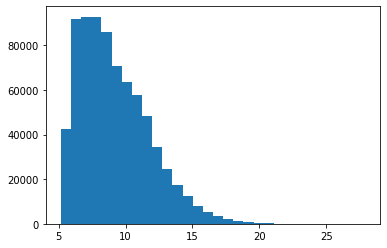

In [7]:
plt.hist(xx1, bins = 30)

In [8]:
finalir = final[(final['tier'] == 'IRON')] 
finalbr = final[(final['tier'] == 'BRONZE')] 
finalsi = final[(final['tier'] == 'SILVER')] 
finalgo = final[(final['tier'] == 'GOLD')] 
finalpl = final[(final['tier'] == 'PLATINUM')] 
finaldi = final[(final['tier'] == 'DIAMOND')] 
finalhi = final[(final['tier'] == 'MASTER') | (final['tier'] == 'GRANDMASTER')  | (final['tier'] == 'CHALLENGER')] 

In [9]:
a = [] 
a.append(finalir['first_drake_time'].describe().mean()/60000)
a.append(finalbr['first_drake_time'].describe().mean()/60000)
a.append(finalsi['first_drake_time'].describe().mean()/60000)
a.append(finalgo['first_drake_time'].describe().mean()/60000)
a.append(finalpl['first_drake_time'].describe().mean()/60000)
a.append(finaldi['first_drake_time'].describe().mean()/60000)
a.append(finalhi['first_drake_time'].describe().mean()/60000)
tierfirstdrake = a
tierfirstdrake

[9.264801555539863,
 9.319335928440355,
 9.480149446658876,
 8.962292881173646,
 8.301846000115885,
 7.678327673160305,
 7.3406971161913965]

## First Dragon Win Rate Stats

In [10]:
final.groupby('winning_team_first_dragon').size()

winning_team_first_dragon
False    265649
True     490763
dtype: int64

In [11]:
final1f = final[(final['first_drake'] == 'F')]
final1f.groupby('win_fire').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_has_soul,winning_team_first_dragon,...,total_drake,win_water,win_air,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
win_fire,,,,,,,,,,,,,,,,,,,,,
0,65234,65234,65234,65234,65234,65234,65234,65234,65234,65234,...,65234,65234,65234,65234,65234,65234,65234,65234,65234,65234
1,124200,124200,124200,124200,124200,124200,124200,124200,124200,124200,...,124200,124200,124200,124200,124200,124200,124200,124200,124200,124200


In [12]:
final1w = final[(final['first_drake'] == 'W')]
final1w.groupby('win_water').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_has_soul,winning_team_first_dragon,...,total_drake,win_fire,win_air,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
win_water,,,,,,,,,,,,,,,,,,,,,
0,62717,62717,62717,62717,62717,62717,62717,62717,62717,62717,...,62717,62717,62717,62717,62717,62717,62717,62717,62717,62717
1,126935,126935,126935,126935,126935,126935,126935,126935,126935,126935,...,126935,126935,126935,126935,126935,126935,126935,126935,126935,126935


In [13]:
final1a = final[(final['first_drake'] == 'A')]
final1a.groupby('win_air').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_has_soul,winning_team_first_dragon,...,total_drake,win_fire,win_water,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
win_air,,,,,,,,,,,,,,,,,,,,,
0,71680,71680,71680,71680,71680,71680,71680,71680,71680,71680,...,71680,71680,71680,71680,71680,71680,71680,71680,71680,71680
1,116534,116534,116534,116534,116534,116534,116534,116534,116534,116534,...,116534,116534,116534,116534,116534,116534,116534,116534,116534,116534


In [14]:
final1m = final[(final['first_drake'] == 'M')]
final1m.groupby('win_mountain').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_has_soul,winning_team_first_dragon,...,total_drake,win_fire,win_water,win_air,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
win_mountain,,,,,,,,,,,,,,,,,,,,,
0,66466,66466,66466,66466,66466,66466,66466,66466,66466,66466,...,66466,66466,66466,66466,66466,66466,66466,66466,66466,66466
1,122646,122646,122646,122646,122646,122646,122646,122646,122646,122646,...,122646,122646,122646,122646,122646,122646,122646,122646,122646,122646


## First Dragon Time vs Win Rate Stats

In [15]:
def drakeplot(firstwin): 
    bb = list(range(21))[5:]
    len(bb)
    firstwin = firstwin[:32]
    int(len(firstwin)/2)
    aa = []
    for i in range(int(len(firstwin)/2)):
        aa.append(firstwin[2*i+1]/(firstwin[2*i]+firstwin[2*i+1]))
    return aa, bb

In [16]:
aa = drakeplot(firstwin)[0]
bb = drakeplot(firstwin)[1]

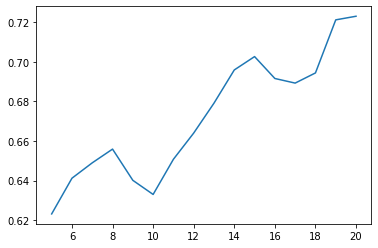

In [17]:
plt.plot(bb,aa)

## cf) First Dragon Time Per Tier

In [18]:
finallow = final[(final['tier'] == 'IRON') | (final['tier'] == 'BRONZE') | (final['tier'] == 'SILVER') | (final['tier'] == 'GOLD')] 
finalhigh = final[(final['tier'] == 'PLATINUM') | (final['tier'] == 'DIAMOND') | (final['tier'] == 'MASTER') | (final['tier'] == 'GRANDMASTER') | (final['tier'] == 'CHALLENGER')] 


(array([1.0473e+04, 2.1191e+04, 2.5265e+04, 2.0692e+04, 2.1999e+04,
        1.9913e+04, 1.6200e+04, 1.3622e+04, 1.2312e+04, 1.0772e+04,
        9.2950e+03, 7.0750e+03, 5.2670e+03, 3.7300e+03, 2.7870e+03,
        1.9580e+03, 1.3860e+03, 9.3400e+02, 6.1500e+02, 3.9400e+02,
        2.5700e+02, 1.4700e+02, 9.8000e+01, 5.3000e+01, 4.2000e+01,
        8.0000e+00, 7.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 5.18365,  5.75961,  6.33557,  6.91153,  7.48749,  8.06345,
         8.63941,  9.21537,  9.79133, 10.36729, 10.94325, 11.51921,
        12.09517, 12.67113, 13.24709, 13.82305, 14.39901, 14.97497,
        15.55093, 16.12689, 16.70285, 17.27881, 17.85477, 18.43073,
        19.00669, 19.58265, 20.15861, 20.73457, 21.31053, 21.88649,
        22.46245]),
 <a list of 30 Patch objects>)

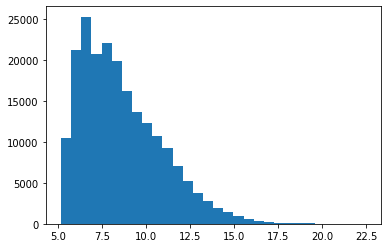

In [19]:
xx = finalhigh['first_drake_time']
xx1 = xx.tolist()
xx1 = xx.apply(lambda x : x/60000)
xx1.describe()
plt.hist(xx1, bins = 30)

(array([2.7134e+04, 6.0891e+04, 6.3513e+04, 6.4215e+04, 6.1658e+04,
        5.1712e+04, 4.7635e+04, 4.4207e+04, 3.7737e+04, 2.7578e+04,
        2.0152e+04, 1.4385e+04, 1.0484e+04, 6.7520e+03, 4.4960e+03,
        3.0660e+03, 1.8800e+03, 1.1140e+03, 6.2600e+02, 3.2700e+02,
        1.7200e+02, 7.4000e+01, 5.1000e+01, 2.3000e+01, 1.3000e+01,
        1.1000e+01, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 5.16018333,  5.91837111,  6.67655889,  7.43474667,  8.19293444,
         8.95112222,  9.70931   , 10.46749778, 11.22568556, 11.98387333,
        12.74206111, 13.50024889, 14.25843667, 15.01662444, 15.77481222,
        16.533     , 17.29118778, 18.04937556, 18.80756333, 19.56575111,
        20.32393889, 21.08212667, 21.84031444, 22.59850222, 23.35669   ,
        24.11487778, 24.87306556, 25.63125333, 26.38944111, 27.14762889,
        27.90581667]),
 <a list of 30 Patch objects>)

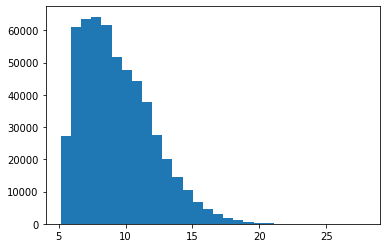

In [20]:
xx = finallow['first_drake_time']
xx1 = xx.tolist()
xx1 = xx.apply(lambda x : x/60000)
xx1.describe()
plt.hist(xx1, bins = 30)

# Soul Dragon

In [21]:
finals = final[final['soul'] != 'No Soul']

In [22]:
finals.groupby('winning_team_has_soul').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_first_dragon,first_drake_time,...,win_fire,win_water,win_air,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
winning_team_has_soul,,,,,,,,,,,,,,,,,,,,,
False,19630,19630,19630,19630,19630,19630,19630,19630,19630,19630,...,19630,19630,19630,19630,19630,19630,19630,19630,19630,19630
True,166827,166827,166827,166827,166827,166827,166827,166827,166827,166827,...,166827,166827,166827,166827,166827,166827,166827,166827,166827,166827


## Win Rate Per Soul

In [23]:
finals.groupby(['soul','winning_team_has_soul']).size()

soul  winning_team_has_soul
A     False                     5358
      True                     42800
F     False                     4898
      True                     40219
M     False                     4803
      True                     42088
W     False                     4571
      True                     41720
dtype: int64

In [25]:
finals.groupby('soul').count()

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,winning_team_has_soul,winning_team_first_dragon,first_drake_time,...,win_fire,win_water,win_air,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
soul,,,,,,,,,,,,,,,,,,,,,
A,48158,48158,48158,48158,48158,48158,48158,48158,48158,48158,...,48158,48158,48158,48158,48158,48158,48158,48158,48158,48158
F,45117,45117,45117,45117,45117,45117,45117,45117,45117,45117,...,45117,45117,45117,45117,45117,45117,45117,45117,45117,45117
M,46891,46891,46891,46891,46891,46891,46891,46891,46891,46891,...,46891,46891,46891,46891,46891,46891,46891,46891,46891,46891
W,46291,46291,46291,46291,46291,46291,46291,46291,46291,46291,...,46291,46291,46291,46291,46291,46291,46291,46291,46291,46291


In [26]:
finalsh = finals[(finals['tier'] == 'PLATINUM') | (finals['tier'] == 'DIAMOND') | (finals['tier'] == 'MASTER') | (finals['tier'] == 'GRANDMASTER') | (finals['tier'] == 'CHALLENGER')]
finalsh.groupby(['winning_team_has_soul','soul']).size()

winning_team_has_soul  soul
False                  A        1318
                       F        1144
                       M        1150
                       W        1108
True                   A       10706
                       F        9952
                       M       10474
                       W       10086
dtype: int64

## Same Number of Elemental Soul Drakes

In [27]:
dd = []
for index, row in finals.iterrows():
    if row['winning_team_has_soul'] == True:
        dd.append(row['winning_team_elemental_drakes'].count(row['soul']))
    else:
        dd.append(row['losing_team_elemental_drakes'].count(row['soul']))

In [28]:
finals['soul_total'] = dd

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
finals.groupby('soul_total').size()

soul_total
2    132770
3     48791
4      4896
dtype: int64

In [30]:
finals2 = finals[finals['soul_total'] == 2]
finals2.groupby('winning_team_has_soul').size()

winning_team_has_soul
False     12368
True     120402
dtype: int64

In [31]:
finals3 = finals[finals['soul_total'] == 3]
finals3.groupby('winning_team_has_soul').size()

winning_team_has_soul
False     6481
True     42310
dtype: int64

In [32]:
finals4 = finals[finals['soul_total'] == 4]
finals4.groupby('winning_team_has_soul').size()

winning_team_has_soul
False     781
True     4115
dtype: int64

In [33]:
finals4.groupby(['winning_team_has_soul','soul']).size()

winning_team_has_soul  soul
False                  A        223
                       F        176
                       M        168
                       W        214
True                   A        996
                       F       1062
                       M       1043
                       W       1014
dtype: int64

In [34]:
finals4h = finals4[(finals4['tier'] == 'PLATINUM') | (finals4['tier'] == 'DIAMOND') | (finals4['tier'] == 'MASTER') | (finals4['tier'] == 'GRANDMASTER') | (finals4['tier'] == 'CHALLENGER')]
finals4h.groupby(['winning_team_has_soul','soul']).size()

winning_team_has_soul  soul
False                  A        60
                       F        25
                       M        41
                       W        45
True                   A       221
                       F       231
                       M       239
                       W       188
dtype: int64

## Elder Dragon

In [35]:
finale = final[(final['winning_team_elder_drakes'] != 0) | (final['losing_team_elder_drakes'] != 0)]

In [36]:
finale

,Unnamed: 0,time,drake_sequence,winning_team_elder_drakes,losing_team_elder_drakes,winning_team_elemental_drakes,losing_team_elemental_drakes,soul,winning_team_has_soul,winning_team_first_dragon,...,win_fire,win_water,win_air,win_mountain,lose_fire,lose_water,lose_air,lose_mountain,first_drake,first_drake_min
151,153,2848,WMFFFFE,1,0,MF,WFFF,F,False,False,...,1,0,0,1,3,1,0,0,W,6
169,171,2079,WFAAE,1,0,,WFAA,A,False,False,...,0,0,0,0,1,1,2,0,W,10
171,173,2233,MWFFFE,1,0,WFFF,M,F,True,False,...,3,1,0,0,0,0,0,1,M,7
174,176,1897,AFWWE,1,0,AFWW,,W,True,True,...,1,2,1,0,0,0,0,0,A,6
211,213,2121,AWMME,1,0,,AWMM,M,False,False,...,0,0,0,0,0,1,1,2,A,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756303,758464,1946,WMAAE,1,0,WMAA,,A,True,True,...,0,1,2,1,0,0,0,0,W,6
756311,758472,2075,AMFFE,1,0,AMFF,,F,True,True,...,2,0,1,1,0,0,0,0,A,8
756362,758523,2208,MWAAE,1,0,,MWAA,A,False,False,...,0,0,0,0,0,1,2,1,M,6
756380,758541,3306,FWAAAAEE,1,1,AAAA,FW,A,True,False,...,0,0,4,0,1,1,0,0,F,15


In [37]:
finale.groupby(['winning_team_elder_drakes','winning_team_last_dragon']).size()

winning_team_elder_drakes  winning_team_last_dragon
0                          False                        4740
1                          False                         283
                           True                        27072
2                          False                          15
                           True                         1503
3                          True                           53
4                          True                            4
dtype: int64

In [38]:
finale.groupby(['winning_team_last_dragon','winning_team_has_soul']).size()

winning_team_last_dragon  winning_team_has_soul
False                     False                     1215
                          True                      3812
                                                      11
True                      False                     6717
                          True                     21847
                                                      68
dtype: int64

In [39]:
finalew = finale[finale['winning_team_last_dragon'] == True]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


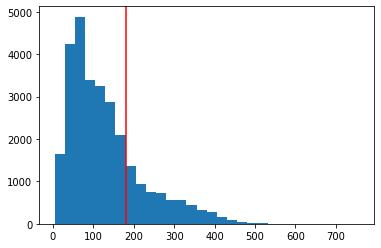

In [40]:
finalew['last_drake_time']
finalew['elderend'] = finalew['time'] - finalew['last_drake_time']
xxx = finalew['elderend'].tolist()
plt.hist(xxx, bins = 30)
plt.axvline(x=180, color = 'r')

In [41]:
finalew['elderend'].describe()

count    28632.000000
mean       128.944712
std         91.844933
min          4.000000
25%         60.000000
50%        106.000000
75%        168.000000
max        757.000000
Name: elderend, dtype: float64

In [42]:
final['elder_total'] = final['winning_team_elder_drakes'] + final['losing_team_elder_drakes']
final['elder_true'] = final['elder_total'].apply(lambda x : x != 0)

In [43]:
finallow = final[(final['tier'] == 'IRON') | (final['tier'] == 'BRONZE') | (final['tier'] == 'SILVER') | (final['tier'] == 'GOLD')] 
finalhigh = final[(final['tier'] == 'PLATINUM') | (final['tier'] == 'DIAMOND') | (final['tier'] == 'MASTER') | (final['tier'] == 'GRANDMASTER') | (final['tier'] == 'CHALLENGER')] 

In [44]:
finalhigh.groupby('elder_true').size()

elder_true
False    199573
True       6925
dtype: int64

In [45]:
finallow.groupby('elder_true').size()

elder_true
False    523169
True      26745
dtype: int64

In [46]:
final.groupby('soul').size()

soul
A           48158
F           45117
M           46891
No Soul    569955
W           46291
dtype: int64

In [47]:
1 - 569955/sum(final.groupby('soul').size().tolist())

0.246501906368487